# <span style="color:#4CCFA2"> [M6] 🧪 Lab -Data Visualization Assignment</span> 📊

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/6 - Python For Data Analysis/Coding-Temple-M6-Lab-Seaborn-Practice/data/auto_mpg_dataset.csv')

In [4]:
# Display the first 5 rows
df.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [5]:
# Summary statistics (using .describe())
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


## Data Cleaning

In [6]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
# Check for null values
df.isnull().sum()

,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0
mpg,0


In [8]:
# Drop the non-numerical column
df = df.drop(columns=['car_name'])

## Correlations

In [9]:
# Get correlations for numeric data
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.067952,0.035575,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.067952,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,0.035575,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,0.579267,0.563450,1.000000


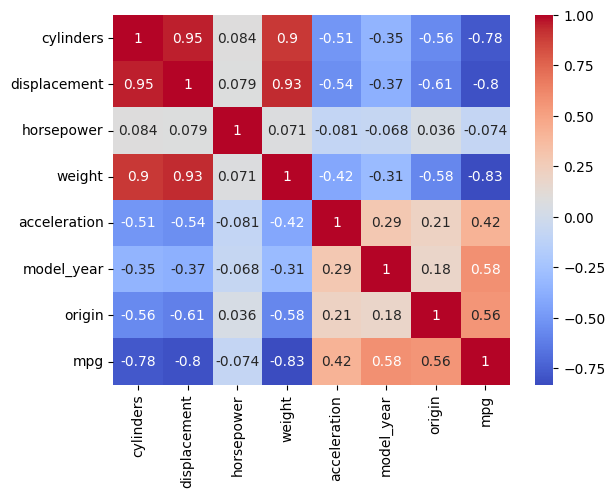

In [11]:
# Create a heatmap
df_heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Save the heatmap figure
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Auto MPG Dataset')
plt.close()

# Create a bar plot to show the correlation of features with MPG
plt.figure(figsize=(10, 6))
corr_with_mpg = df.corr()['mpg'].sort_values(ascending=False)
sns.barplot(x=corr_with_mpg.index, y=corr_with_mpg.values)
plt.title('Correlation of Features with MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.close()

# Create a pairplot to visualize relationships between numerical features
sns.pairplot(df, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], hue='origin')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.close()



In [12]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
df.corr()['mpg'].sort_values(ascending=False)

# Create a bar plot to visualize the correlation of features with MPG
plt.figure(figsize=(10, 6))
corr_with_mpg = df.corr()['mpg'].sort_values(ascending=False)
sns.barplot(x=corr_with_mpg.index, y=corr_with_mpg.values)
plt.title('Correlation of Features with MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.close()

print("Bar plot of correlation with MPG has been saved as 'correlation_with_mpg_barplot.png'.")

# Interpret the results
print("\nInterpretation of correlations with MPG:")
for feature, correlation in corr_with_mpg.items():
    if feature != 'mpg':
        print(f"{feature}: {correlation:.3f}")
        if correlation > 0.5:
            print(f"  Strong positive correlation with MPG")
        elif correlation < -0.5:
            print(f"  Strong negative correlation with MPG")
        elif 0.3 < correlation <= 0.5 or -0.5 <= correlation < -0.3:
            print(f"  Moderate correlation with MPG")
        else:
            print(f"  Weak correlation with MPG")



Bar plot of correlation with MPG has been saved as 'correlation_with_mpg_barplot.png'.

Interpretation of correlations with MPG:
model_year: 0.579
  Strong positive correlation with MPG
origin: 0.563
  Strong positive correlation with MPG
acceleration: 0.420
  Moderate correlation with MPG
horsepower: -0.074
  Weak correlation with MPG
cylinders: -0.775
  Strong negative correlation with MPG
displacement: -0.804
  Strong negative correlation with MPG
weight: -0.832
  Strong negative correlation with MPG


For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

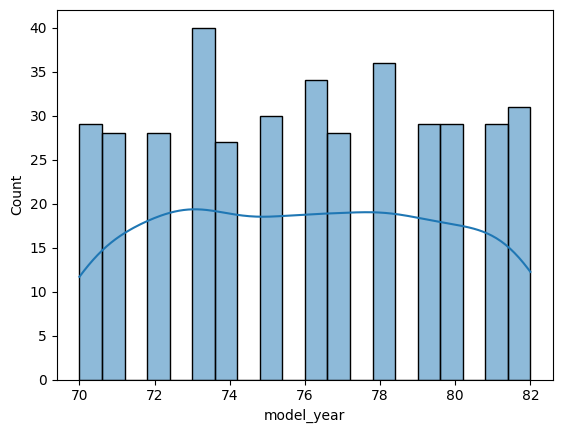

In [13]:
histogram = sns.histplot(df['model_year'], bins=20, kde=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'], bins=20, kde=True)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.close()

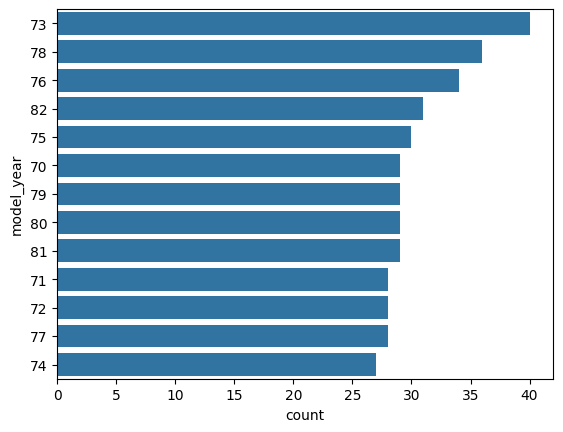

In [14]:
sns.countplot(data = df,
              y= 'model_year', order = df['model_year'].value_counts().index);

**Distribution of Origin**

Histogram of car origins has been saved as 'car_origin_distribution.png'.

Interpretation of car origins:
Origin 1: 249 cars (62.6%)
Origin 3: 79 cars (19.8%)
Origin 2: 70 cars (17.6%)


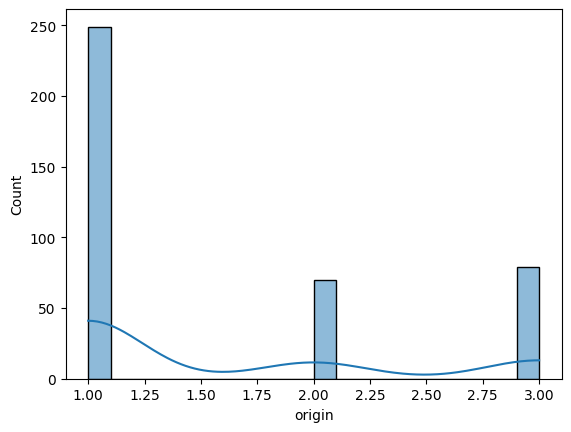

In [15]:
histogram = sns.histplot(df['origin'], bins=20, kde=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['origin'], bins=20, kde=True)
plt.title('Distribution of Car Origins')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.close()

print("Histogram of car origins has been saved as 'car_origin_distribution.png'.")

# Interpret the results
origin_counts = df['origin'].value_counts()
total_cars = len(df)

print("\nInterpretation of car origins:")
for origin, count in origin_counts.items():
    percentage = (count / total_cars) * 100
    print(f"Origin {origin}: {count} cars ({percentage:.1f}%)")





**Distribution of Cylinders**

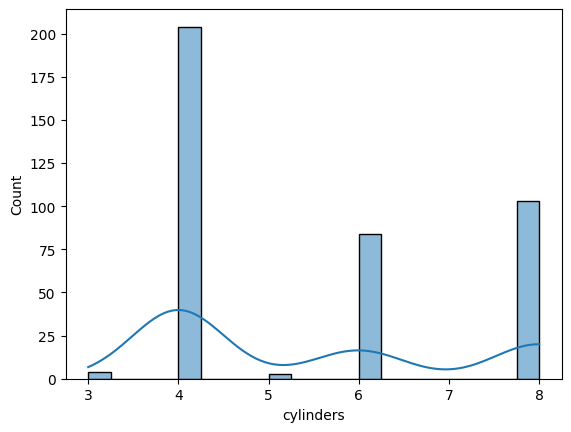

In [16]:
histogram = sns.histplot(df['cylinders'], bins=20, kde=True)


## Boxplots/Histograms

**MPG Distribution**

<Axes: xlabel='cylinders', ylabel='mpg'>

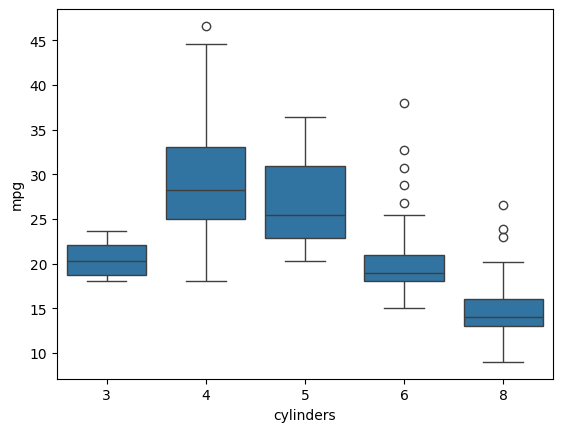

In [17]:
sns.boxplot(x='cylinders', y='mpg', data=df)

**Weight Distribution**

<Axes: xlabel='weight', ylabel='Count'>

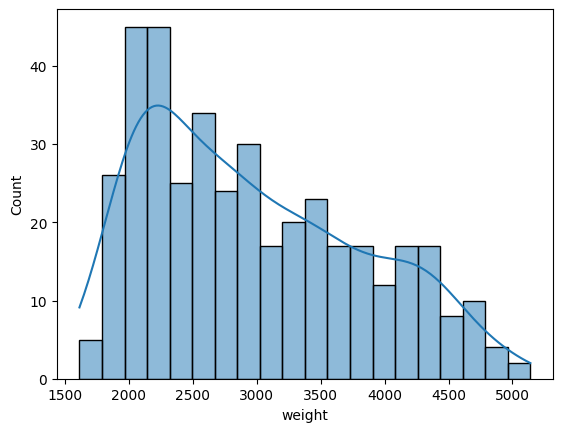

In [18]:
sns.histplot(df['weight'], bins=20, kde=True)

## Scatterplots

**Weight vs. MPG**

<Axes: xlabel='weight', ylabel='mpg'>

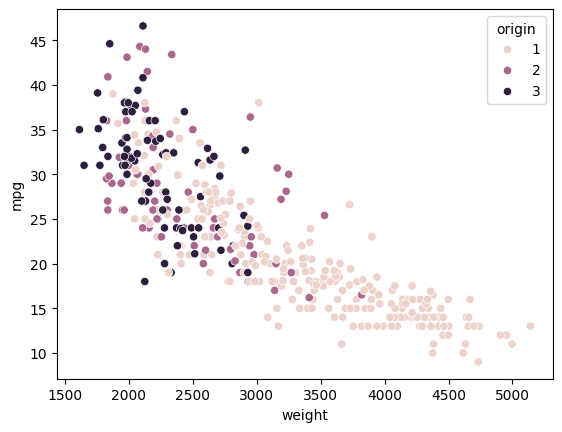

In [19]:
sns.scatterplot(x='weight', y='mpg', data=df, hue='origin')

## Your turn!

In [ ]:
# Create more plot(s) of your choosing to help you explore the data!